# Mapeos en 1d

---

**NOTA** Los ejercicios de este capítulo consituyen la tarea 3. Estos ejercicios involucran que ustedes escriban código que debe ejecutarse correctamente para responder las preguntas que se formulan en los ejercicios. El código debe estar correctamente documentada o al menos comentado, y en general se deben definir funciones que realicen cosas concretas.

**Fecha límite de envío inicial del PR:** lunes 12 de septiembre

**Fecha límite de aceptación del PR:** lunes 26 de septiembre

---

## Órbitas

Iniciaremos el estudio de sistemas dinámicos considerando *mapeos* en una dimensión. Los mapeos en una dimensión son simplemente aplicaciones de $F_\mu : \mathbb{R} \rightarrow \mathbb{R}$, de la forma

\begin{equation}
x_{n+1} = F_\mu (x_n).
\end{equation}

Aquí, $x_n$ representa el estado del sistema al "tiempo" $n$.

Por ahora, la única suposición importante para $F_\mu$ es que es una función que **no** involucra ningún tipo de variable estocástica o nada aleatorio. En este caso diremos que el sistema es determinista: el estado al "tiempo" $n+1$ sólo depende del estado al tiempo $n$, y de los parámetros $\mu$ del mapeo (que permanecen constantes respecto al tiempo).


*Iterar* la función $F_\mu(x)$ significa evaluarla una y otra vez, a partir de un valor inicial $x_0$ que llamaremos *condición inicial*. Esto lo escribiremos como $x_1=F_\mu(x_0)$ para el primer iterado, $x_2=F^2_\mu(x_0)=F_\mu(x_1)$ para el segundo, y en general, para el $n$-nésimo iterado escribiremos $x_n=F^n_\mu(x_0)$.

Por ejemplo, para $F(x)=x^2+1$, y omitiéndo el subíndice 0, tendremos
\begin{eqnarray}
F^2(x) & = & (x^2+1)^2+1,\\
F^3(x) & = & ((x^2+1)^2+1)^2+1,\\
F^4(x) & = & (((x^2+1)^2+1)^2+1)^2+1,
\end{eqnarray}
etc.

Hablaremos de una órbita como la secuendia de iterados, es decir, $x_0, x_1, x_2, \dots$. Así, para el ejemplo anterior con $x_0=0$ tendremos $x_1=1$, $x_2 = 2$, $x_3 = 5$, $x_4 = 26$, etc. Esta órbita, aparentemente tiende a infinito con $n\to\infty$.

Hay varios tipos de órbitas. Como veremos, unas órbitas particularmente importantes son los puntos fijos, los cuales satisfacen la ecuación
\begin{equation}
F_\mu(x) = x.
\end{equation}

Así, para $F(x)=x^2-x-4$, los puntos fijos satisfacen $x^2-2x-4=0$, cuyas soluciones son $1\pm\sqrt{5}$.

Numéricamente, y usando que conocemos los puntos fijos, tenemos:

In [1]:
f(x) = x^2-x-4

f(1+sqrt(5))-(1+sqrt(5)), f(1-sqrt(5))-(1-sqrt(5))

(0.0,4.440892098500626e-16)

De aquí vemos que hay ciertos errores numéricos que no permiten concluir que la segunda solución es punto fijo. Sin embargo, usando números de precisión extendida, vemos que con más bits de precisión, $f(x)-x$ se acerca a cero.

In [2]:
get_bigfloat_precision()

256

In [3]:
f(1-sqrt(BigInt(5)))-(1-sqrt(BigInt(5)))

6.908934844075555700309081490240319656892800291549025108018962776134873442529942e-77

Otro tipo importante de órbitas son las órbitas periódicas. En este caso tenemos que una secuencia *finita* de iterados, se repite: $x_0, x_1, \dots, x_{n-1}, x_0, x_1, \dots$. El menor número de puntos de una órbita periódica (sin repeticiones) es lo que se llama periodo. Cada punto de dicha órbita es periódico con periodo $n$.

Vale la pena notar que los puntos fijos son de periodo 1.

Un punto que pertenece a una órbita de periodo $n$ satisface la ecuación $F^n(x_0) = x_0$. Esto es, un punto de periodo $n$ del mapeo $F$, es un punto fijo del mapeo $F^n$.

Un punto $x_0$ se llama *eventualmente periódico* cuando, sin ser punto fijo o periódico, después de un cierto número finito de iteraciones, los iterados pertenecen a una órbita periódica. Un ejemplo, para el mapeo $F(x)=x^2-1$, es $x_0=1$: $F(1)=0$, $F^2(0)=-1$, $F^3(-1)=0$, etc.

En sistemas dinámicos típicos, la mayoría de los puntos no son fijos ni periódicos. Por ejemplo, el mapeo $T(x)=2x$ tiene como punto único punto fijo $x^*=0$. Cualquier otra órbita tiende a $\;\pm\infty$, ya que $T^n(x_0) = 2^n x_0$ y entonces $|T^n(x_0)|\to\infty$. 

En general, la situación es aún más compleja e interesante.

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


In [1]:
using PyPlot

In [2]:
using LaTeXStrings

In [3]:
function F_1(c::Real, N::Int64)  # Se crea la función que realiza el mapeo con la función F(x)=x^2-2 de tal forma que 
    x=0                         #  le des como argumento la condición incial y el núemro de iteraciones
    dom=Float64[]   # se crea la variable 'x' donde se guardarán los valores de las iteraciones
    y=Float64[]   # se crea el arreglo 'dom' donde se guardarán las x_n iteraciones y se crea el 
    for i in 1:N  # arreglo 'y' donde se guardarán las x_(n+1) iteraciones
        push!(dom,x) # en el ciclo for se calculan los valores de las iteraciones y se van guardando
        x=c^2-2      # en los arreglos anteriores
        push!(y,x)
        c=x         # se actauliza el valor de la variable 'x'
    end
    dom, y     # se regresa el valor de los arreglos con las iteraciones correspondientes a x_n
end            # x_(n+1)

F_1 (generic function with 1 method)

In [4]:
x_0,y_0=F_1(0,100) # Se evalua la función anterior en 0 con 100 iteraciones

([0.0,-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0  …  2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0],[-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0  …  2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0])

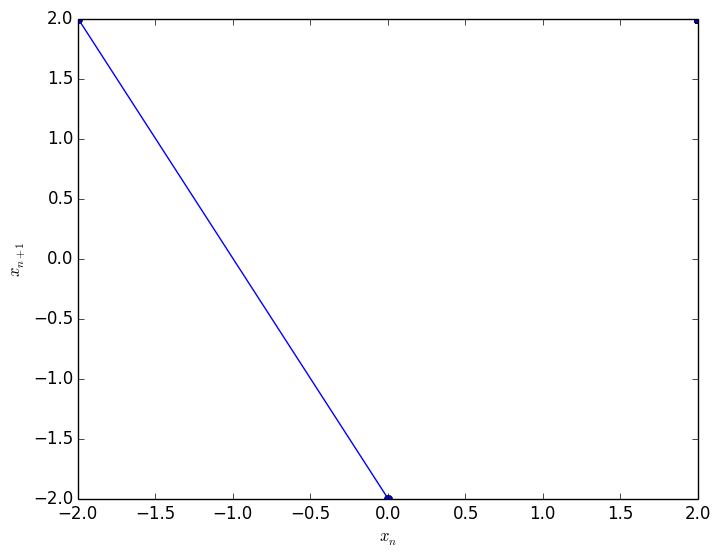

PyObject <matplotlib.text.Text object at 0x3154e4110>

In [5]:
plot(x_0,y_0,"-o") # Se grafican los resutlados F(x_n) vs x_n
xlabel(L"x_{n}")
ylabel(L"F(x_n)")

In [6]:
x_01,y_01=F_1(0.1,1000) # Se evalua la función anterior en 0.1 con 1000 iteraciones

([0.0,-1.99,1.9601,1.84199,1.39293,-0.0597333,-1.99643,1.98574,1.94317,1.77589  …  -1.86438,1.47591,0.178309,-1.96821,1.87383,1.51126,0.283896,-1.9194,1.68411,0.836224],[-1.99,1.9601,1.84199,1.39293,-0.0597333,-1.99643,1.98574,1.94317,1.77589,1.15379  …  1.47591,0.178309,-1.96821,1.87383,1.51126,0.283896,-1.9194,1.68411,0.836224,-1.30073])

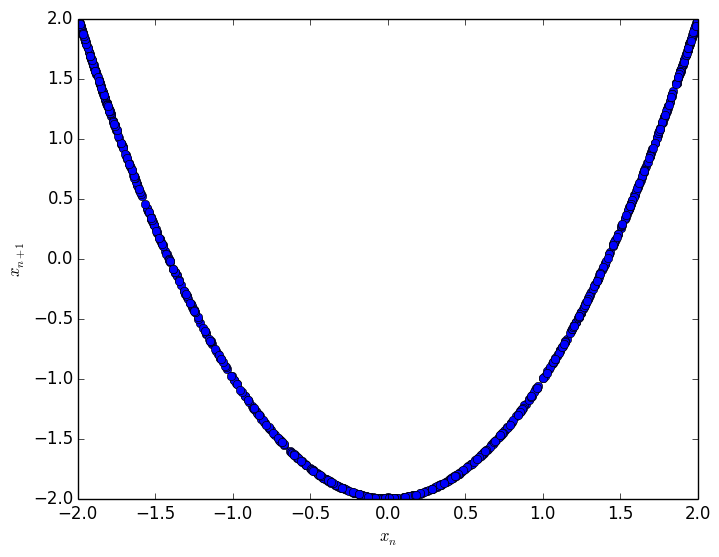

PyObject <matplotlib.text.Text object at 0x315795950>

In [7]:
plot(x_01,y_01, "o") # Se grafican los resutlados F(x_n) vs x_n
xlabel(L"x_{n}")
ylabel(L"F(x_n)")

In [8]:
x_02,y_02=F_1(0.001,1000) # Se evalua la función anterior en 0.001 con 100 iteraciones

([0.0,-2.0,2.0,1.99998,1.99994,1.99974,1.99898,1.99591,1.98364,1.93482  …  1.98604,1.94435,1.7805,1.17016,-0.630717,-1.6022,0.567033,-1.67847,0.817273,-1.33207],[-2.0,2.0,1.99998,1.99994,1.99974,1.99898,1.99591,1.98364,1.93482,1.74353  …  1.94435,1.7805,1.17016,-0.630717,-1.6022,0.567033,-1.67847,0.817273,-1.33207,-0.225602])

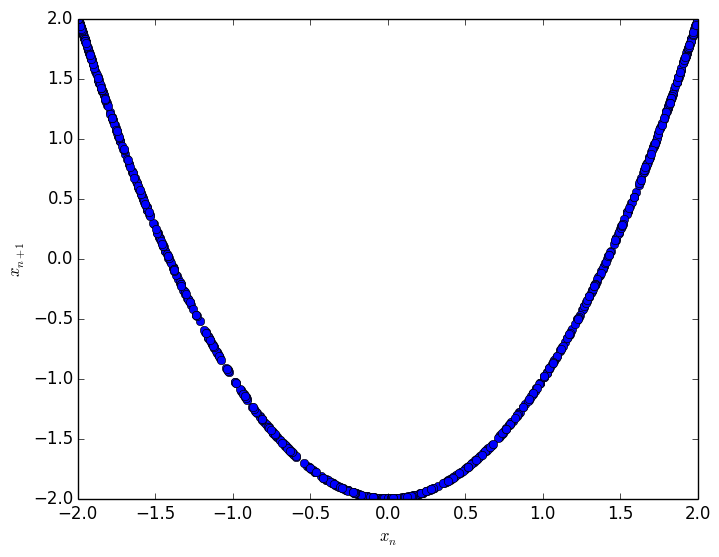

PyObject <matplotlib.text.Text object at 0x31594fe90>

In [9]:
plot(x_02,y_02,"o") # Se grafican los resutlados F(x_n) vs x_n
xlabel(L"x_{n}")
ylabel(L"F(x_n)")

Se puede observar que después de muchas iteraciones, en el cero, se oscila entre 0 y 2; sin embargo si se aplican valores un poco lejanos, como 0.1 o 0.001, las oscilaciones forman una parabola definida en el intervalo [-2,2].

## Análisis gráfico

A continuación ilustraremos una manera gráfica de visualizar la dinámica en un mapeo de un grado de libertad. Para esto hay que instalar alguna (o varias) paqueterías gráficas. En lo que sigue yo utilizaré el paquete `Plots.jl`; la documentación oficial se encuentra [aquí](https://juliaplots.github.io), y hay un [video](https://www.youtube.com/watch?v=LGB8GvAL4HA) donde se explican detalles del funcionamiento. Yo la utilizaré para usar como *backend* [`PyPlot.jl`](https://github.com/stevengj/PyPlot.jl), aunque hay varios más que ustedes pueden libremente elegir.

Antes que nada, deben instalar la paquetería. Dado que `Plots.jl` es un paquete *registrado*, uno lo puede instalar simplemente con:

```julia
    Pkg.add("Plots")
```

También instalaremos otras dos paqueterías útiles:
```julia
    Pkg.add("PlotRecipes")  # Instala una paquetería auxiliar
    Pkg.add("PyPlot")       # Instala PyPlot, que usaré como *backend*
```

Otros *backends* interesantes son `Plotly` y `GR`.

In [35]:
Pkg.add("Plots")

INFO: Cloning cache of FixedSizeArrays from git://github.com/SimonDanisch/FixedSizeArrays.jl.git
INFO: Cloning cache of Iterators from git://github.com/JuliaLang/Iterators.jl.git
INFO: Cloning cache of Measures from git://github.com/dcjones/Measures.jl.git
INFO: Cloning cache of PlotUtils from git://github.com/JuliaPlots/PlotUtils.jl.git
INFO: Cloning cache of Plots from git://github.com/tbreloff/Plots.jl.git
INFO: Cloning cache of RecipesBase from git://github.com/JuliaPlots/RecipesBase.jl.git
INFO: Cloning cache of Showoff from git://github.com/JuliaGraphics/Showoff.jl.git
INFO: Installing FixedSizeArrays v0.2.3
INFO: Installing Iterators v0.1.10
INFO: Installing Measures v0.0.3
INFO: Installing PlotUtils v0.0.4
INFO: Installing Plots v0.8.2
INFO: Installing RecipesBase v0.0.6
INFO: Installing Showoff v0.0.7
INFO: Building Plots
INFO: Cannot find deps/plotly-latest.min.js... downloading latest version.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
  

In [36]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of BinDeps...
INFO: Updating cache of HttpParser...
INFO: Updating cache of Conda...
INFO: Updating cache of Compat...
INFO: Updating cache of JSON...
INFO: Updating cache of Mustache...
INFO: Computing changes...
INFO: Upgrading BinDeps: v0.4.2 => v0.4.5
INFO: Upgrading Compat: v0.8.7 => v0.9.0
INFO: Upgrading Conda: v0.2.3 => v0.3.1
INFO: Upgrading FileIO: v0.1.0 => v0.1.2
INFO: Upgrading HttpParser: v0.1.1 => v0.2.0
INFO: Upgrading JSON: v0.6.0 => v0.7.0
INFO: Upgrading Mustache: v0.0.15 => v0.1.1
INFO: Building HttpParser
INFO: Recompiling stale cache file /Users/FernandoJefte/.julia/lib/v0.4/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /Users/FernandoJefte/.julia/lib/v0.4/Compat.ji for module Compat.
INFO: Recompiling stale cache file /Users/FernandoJefte/.julia/lib/v0.4/URIParser.ji for module URIParser.
INFO: Recompiling stale cache file /Users/FernandoJefte/.julia/lib/v0.4/SHA.ji for module SHA.
INFO: Attempti

Archive:  /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/downloads/v2.7.1.zip
feae95a3a69f111bc1897b9048d9acbc290992f9
   creating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/.gitignore  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/.mailmap  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/.travis.yml  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/AUTHORS  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/LICENSE-MIT  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/Makefile  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/README.md  
  inflating: /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1/bench.c  
   creating: /Users/Fernand

INFO: Attempting to Create directory /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/usr/lib
INFO: Directory /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/usr/lib already created
INFO: Changing Directory to /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1
INFO: Changing Directory to /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src/http-parser-2.7.1
INFO: Changing Directory to /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src
INFO: Attempting to Create directory /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/usr/lib
INFO: Directory /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/usr/lib already created
INFO: Changing Directory to /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src


cc  -I. -DHTTP_PARSER_STRICT=0  -Wall -Wextra -Werror -O3  -fPIC -c http_parser.c -o libhttp_parser.o
cc  -shared -o libhttp_parser.dylib libhttp_parser.o


INFO: Changing Directory to /Users/FernandoJefte/.julia/v0.4/HttpParser/deps/src


Para usarla la debemos cargar con el comando:

In [37]:
Pkg.add("PlotRecipes")

INFO: Cloning cache of AxisAlgorithms from git://github.com/timholy/AxisAlgorithms.jl.git
INFO: Cloning cache of Calculus from git://github.com/johnmyleswhite/Calculus.jl.git
INFO: Cloning cache of DataArrays from git://github.com/JuliaStats/DataArrays.jl.git
INFO: Cloning cache of DataFrames from git://github.com/JuliaStats/DataFrames.jl.git
INFO: Cloning cache of Distributions from git://github.com/JuliaStats/Distributions.jl.git
INFO: Cloning cache of ForwardDiff from git://github.com/JuliaDiff/ForwardDiff.jl.git
INFO: Cloning cache of GZip from git://github.com/JuliaIO/GZip.jl.git
INFO: Cloning cache of Interpolations from git://github.com/tlycken/Interpolations.jl.git
INFO: Cloning cache of KernelDensity from git://github.com/JuliaStats/KernelDensity.jl.git
INFO: Cloning cache of NaNMath from git://github.com/mlubin/NaNMath.jl.git
INFO: Cloning cache of Optim from git://github.com/JuliaOpt/Optim.jl.git
INFO: Cloning cache of PDMats from git://github.com/JuliaStats/PDMats.jl.git
IN

In [1]:
using Plots, PlotRecipes

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/FernandoJefte/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/FernandoJefte/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/FernandoJefte/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/FernandoJefte/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
# Esto define a `PyPlot.jl` como el *backend* que usaremos
# Puede tardar un poco en cargarse, especialmente la primer vez que se usa.
pyplot()

Plots.PyPlotBackend()

Otros *backends* pueden usarse llamando el nombre del *backend* concreto. Por ejemplo:

```julia
gr()       # carga GR
plotly()   # carga Plotly
```
    
Los backends tienen que estar instalados.

Cargamos el paquete `LaTeXStrings.jl`, que normalmente ha sido instalado por `PyPlot.jl`. Sirve para poner cadenas de caractéres, en LaTex, para los ejes o los títulos.

In [3]:
using LaTeXStrings

La idea del análisis gráfico es poder visualizar los iterados de una órbita. En el eje de las abscisas dibujaremos $x_n$ y en el de las ordenadas dibujaremos $F(x_n)$. Entonces, para localizar $x_{n+1}$ simplemente necesitamos la gráfica de $y=F(x)$.


Como ejemplo usaremos $F(x) = \sqrt{x}$.

In [4]:
x0 = 5.0*rand()
x1 = sqrt(x0)

rangox = 0.0:1/32:5.2

x0

3.9628580910870914

[Plots.jl] Initializing backend: pyplot



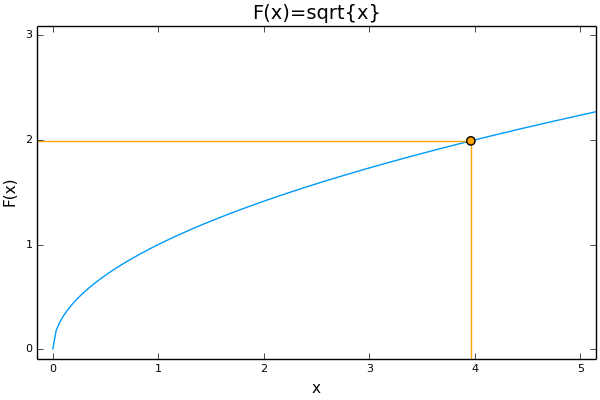

In [5]:
# Se tarda un poco porque inicializa varias cosas internamente;
# entre otras cosas, carga PyPlot.

# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=("x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), "F(x)"), 
legend=false, title="F(x)=sqrt{x}", grid=false)

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=(:orange), marker=:dot)


Para visualizar el valor $x_1$ en el eje `x`, usamos la identidad, i.e., la recta $y=x$. Noten el ligero cambio para que los ejes y el título aparezcan más agradables.


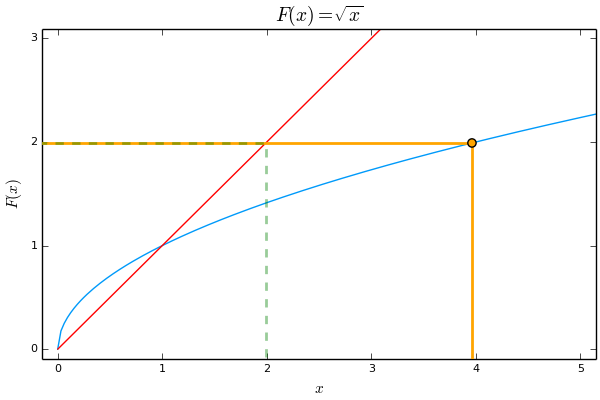

In [6]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=:orange, lw=2.0, marker=:point)
# Dibuja x_1 -> Id(x_1) = x_1
plot!([-0.5, x1, x1], [x1, x1, -0.5], line=(:green, :dash, 2.0, 0.4))


Dado que tenemos $x_1$ en el eje $x$, el mismo proceso de antes puede ser implementado para obtener $x_2$, o cualquier otro iterado $x_n$. Sin embargo, vale la pena notar que, una vez que estamos en la diagonal, podemos ir a la función para obtener $x_2$, y nuevamente a la diagonal y a la función para tener $x_3$, etc.

In [7]:
x2 = sqrt(x1)

1.4109191568233193

In [8]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

plot!([x0, x0, x1, x1, x2], [-0.5, x1, x1, x2, x2], 
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

savefig("test.pdf");

**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [7]:
function mapeo_chido(f, x0, N::Int64) #Se define la función requerida que come la función 'f',
    x=Float64[x0]       # la condición inicial 'x0' y el número de iteraciones 'N'. Se definen
    y=Float64[0.0]   # los arreglos 'x','y' que tendrán las iteraciones a graficar y se define 
    c=0    # la variable 'c' que guardará los valores de las iteraciones y se irá actualizando.
    for i in 1:N    # en el primer ciclo, se guarda el valor de la condición inicial de tal forma
        push!(x,x0) # que aparezca dos veces en 'x', se evalúa la función en la condición inicial
        c=f(x0)     # y se guarda en la variable 'c', se guarda dicho valor en el arreglo 'y', se 
        push!(y,c)  # redefine el valor de la condición inicial y se guarda dicho valor en los dos  
        x0=c        # arreglos 'x' y 'y'. Al final del primer ciclo se tiene que en el arreglo
        push!(x,c)  # 'x' se tienen dos veces el valor de la condición inicial 'x0' y una vez el valor
        push!(y,c)  # del siguiente iterado, en el arreglo 'y' se tiene el 0.0 y dos veces el valor de la primera
        end         # iteración. 
    x,y             # Se escupen los dos arreglos 'x', 'y' finales.
end

mapeo_chido (generic function with 1 method)

In [7]:
xf_fx = mapeo_chido(sqrt, 2.5, 4) # se evalúa la función anterior en la función raiz cuadrada,
# en la condición inicial '2.5' y en cuatro iteraciones.

([2.5,2.5,1.5811388300841898,1.5811388300841898,1.2574334296829355,1.2574334296829355,1.1213533919701386,1.1213533919701386,1.058939748980148],[0.0,1.5811388300841898,1.5811388300841898,1.2574334296829355,1.2574334296829355,1.1213533919701386,1.1213533919701386,1.058939748980148,1.058939748980148])


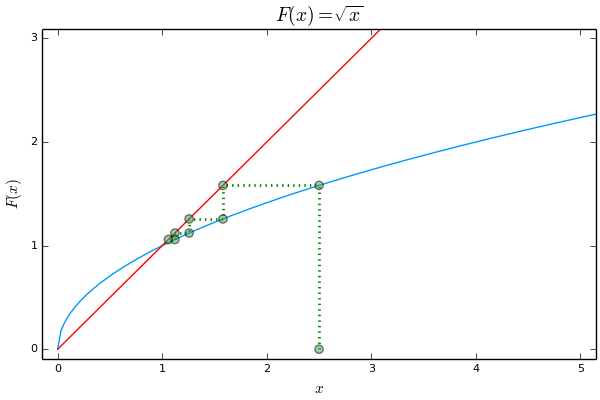

In [8]:
plot(rangox, sqrt,  # se grafica la función raiz cuadrada en el intervalo 'rangox' previamente definido
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

plot!(mapeo_chido(sqrt, 2.5,4), # se grafica los puntos obtenidos de la función 'mapeo_chido'
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

Obviamente, los puntos fijos de un mapeo pueden ser obtenidos del análisis gráfico descrito: sólo basta encontrar las intersecciones de la recta identidad con la función del mapeo.

Vale la pena enfatizar que, si bien el análisis gráfico es útil, no sirve para *comprobar* propiedades sobre la dinámica del mapeo, aunque sirve para entender detalles de ésta.

**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

In [35]:
f1(x)=x^2-1.1 # se define la función del ejercico como 'f1'

f1 (generic function with 1 method)

In [52]:
xf1, yf1=mapeo_chido(f1, 0.01, 100) # se calculan 100 iteraciones de la función 'f1' con condición inicial '0.01'

([0.01,0.01,-1.0999,-1.0999,0.10978,0.10978,-1.08795,-1.08795,0.0836316,0.0836316  …  -1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608],[0.0,-1.0999,-1.0999,0.10978,0.10978,-1.08795,-1.08795,0.0836316,0.0836316,-1.09301  …  0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608,-1.09161,-1.09161,0.091608,0.091608])

In [4]:
rangox1 = -10.0:1/32:10 # se define un rango para le dominio

-10.0:0.03125:10.0


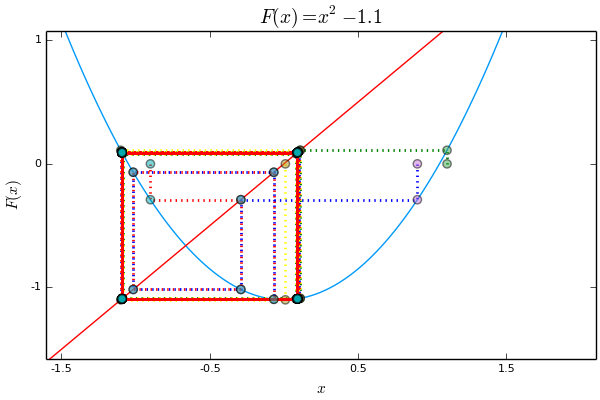

In [16]:
plot(rangox1, f1,  # se grafica la función 'f1' en el rango 'rangox1'
xaxis=(L"x", (-1.5, 2.0), -1.5:2.0), # en la gráfica se muestra el rango de x de (-1.5,1)
yaxis=((-1.5, 1.0), L"F(x)"),    # de igual forma para y
legend=false, title=L"F(x)=x^2-1.1", grid=false) # se le ponen títulos a la gráfica
plot!(rangox1, x->x, color=:red)  # se grafica sobre el mismo espacio la función identidad en el 
                                 # en el mismo rango 'rangox1'
# se grafica el resultado de las iteraciones para distitnos valores de la condición inicial
plot!(mapeo_chido(f1, 1.1,50), 
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(f1, 0.9,50),
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(f1, 0.01,50),
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(f1, -0.9,50),
line=(:red, :path, 2.0, :dot), marker=(:point, 0.5))

Como se puede observar, las condiciones inciales después de varias iteraciones convergen a los mimos puntos periódicos; los puntos periódicos son los que están sobre la gráfica del mapeo F(x) que conforman el cuadro al que convergen las condiciones iniciales, los cuales son $-1.09161$ y $0.091608$.

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

In [20]:
g1(x)= 1/(3*x)  # se definen las funciones del ejercicio
g2(x)= -(x^5)/5
g3(x)= (x/2) - 2

g3 (generic function with 1 method)

# 1

In [11]:
mapeo_chido(g1, 2.5, 100) # se calculan las iteraciones para la función 'F(x)=1/3x' con condición
# incial 2.5 y 100 iteraciones

LoadError: LoadError: UndefVarError: mapeo_chido not defined
while loading In[11], in expression starting on line 1


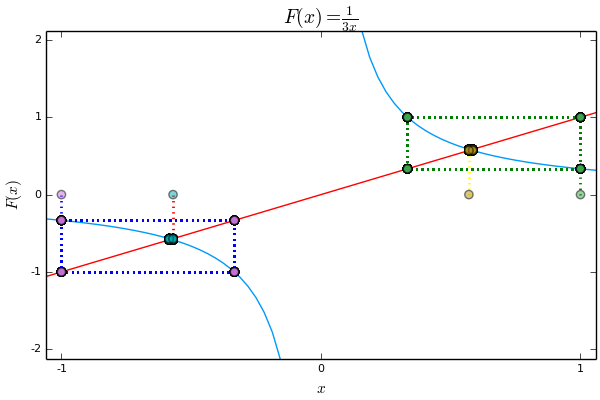

In [15]:
plot(rangox1, g1,  # se grafica la función 'g1' en el intervalo -5 a 5
    xaxis=(L"x", (-1.0, 1.0), -1.0:1.0), 
    yaxis=((-2.0, 2.0), L"F(x)"), 
legend=false, title=L"F(x)=\frac{1}{3x}", grid=false)
plot!(rangox1, x->x, color=:red) 
# se grafican los resultados de las iteraciones para 'g1' con distintas condiciones iniciales y 100  iteraciones
plot!(mapeo_chido(g1, 1,100),
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g1, -1.0,100), 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g1, 0.57,100), 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g1, -0.57,100), 
line=(:red, :path, 2.0, :dot), marker=(:point, 0.5))

In [1]:
# Se utiliza la función del notebook 4 para calcular raices de funciones mediante el método de 
# Newton.
function compute_roots(f, f´)
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [3]:
# Se calculan las raices de la función f(x)=1/3x - x
compute_roots(x-> (1/(3*x))-x, x-> (-1/(3*x^2)-1))

321-element Array{Float64,1}:
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
 -0.57735
  ⋮      
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735
  0.57735

En esta función tiene dos puntos fijos, los cuales se calcularon y son $-0.57735$ y $0.57735$. Se observa en la figura anterior que los puntos cercanos al los puntos fijos tienen periodo 3 y conforme nos acercamos al valor de dichos puntos, se observa que son puntos fijos.

# 2

In [65]:
mapeo_chido(g2, 1, 100) # se calculan las iteraciones para la función 'F(x)=-x^5/5' con condición
# incial 1 y 100 iteraciones

([1.0,1.0,-0.2,-0.2,6.4e-5,6.4e-5,-2.14748e-22,-2.14748e-22,9.13439e-110,9.13439e-110  …  -0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0],[0.0,-0.2,-0.2,6.4e-5,6.4e-5,-2.14748e-22,-2.14748e-22,9.13439e-110,9.13439e-110,-0.0  …  0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0])


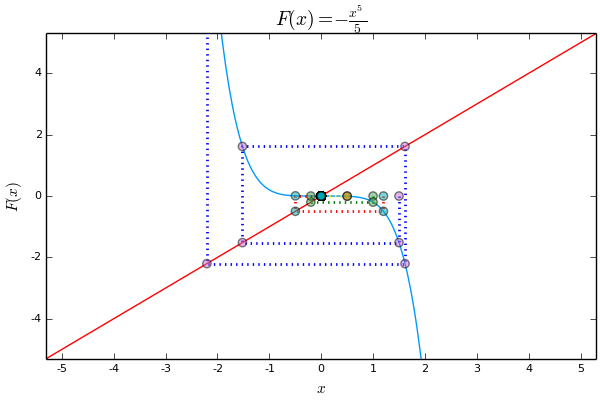

In [21]:
plot(rangox1, g2,  # se grafica la función 'g2' en el intervalo -5 a 5
    xaxis=(L"x", (-5.0, 5.0), -5.0:5.0), 
    yaxis=((-5.0, 5.0), L"F(x)"), 
legend=false, title=L"F(x)=-\frac{x^5}{5}", grid=false)
plot!(rangox1, x->x, color=:red) 
# se grafican los resultados de las iteraciones para 'g2' con distintas condiciones iniciales y 100  iteraciones
plot!(mapeo_chido(g2, 1,100), 
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g2, 1.5,100), 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g2, 0.5,100), 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g2, 1.2,100), 
line=(:red, :path, 2.0, :dot), marker=(:point, 0.5))

In [7]:
function F_2(f, c::Real, N::Int64)  # Se crea la función que realiza el mapeo con la función f de tal forma que 
    x=0                         #  le des como argumento la condición incial y el núemro de iteraciones
    dom=Float64[]   # se crea la variable 'x' donde se guardarán los valores de las iteraciones
    y=Float64[]   # se crea el arreglo 'dom' donde se guardarán las x_n iteraciones y se crea el 
    for i in 1:N  # arreglo 'y' donde se guardarán las x_(n+1) iteraciones
        push!(dom,x) # en el ciclo for se calculan los valores de las iteraciones y se van guardando
        x=f(c)      # en los arreglos anteriores
        push!(y,x)
        c=x         # se actauliza el valor de la variable 'x'
    end
    dom, y     # se regresa el valor de los arreglos con las iteraciones correspondientes a x_n
end

F_2 (generic function with 1 method)

In [25]:
#Se calculan las iteraciones para distitnas condiciones iniciales.
fgx1,fgy1=F_2(g2,1,100);
fgx2,fgy2=F_2(g2,1.2,100);
fgx3,fgx3=F_2(g2,0.5,100);


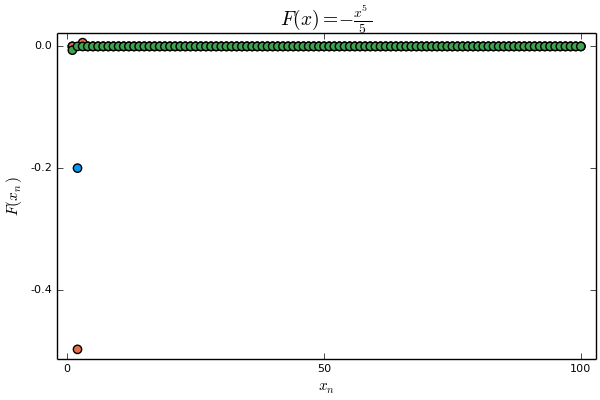

In [30]:
#Se grafican
scatter(fgx1,xaxis=(L"x_n"), 
    yaxis=( L"F(x_n)"), 
legend=false, title=L"F(x)=-\frac{x^5}{5}", grid=false)
scatter!(fgx2)
scatter!(fgx3)

En esta función el punto fijo es el cero. Los puntos cuya imágen cae fuera de la meseta central, divergen; los puntos dentro de la meseta convergen al cero. Enotnces, el cero es un punto atractivo en una vecindad que caiga dentro de la meseta y los puntos fuera son repulsivos. Como se puede observar en la figura enterior el cero es un punto muy estable; las condiciones iniciales cercanas al cero convergen muy rápido.

# 3

In [68]:
mapeo_chido(g3, 2.5, 100) # se calculan las iteraciones para la función 'F(x)=x/2 - 2' con condición
# incial 1 y 100 iteraciones

([2.5,2.5,-0.75,-0.75,-2.375,-2.375,-3.1875,-3.1875,-3.59375,-3.59375  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0],[0.0,-0.75,-0.75,-2.375,-2.375,-3.1875,-3.1875,-3.59375,-3.59375,-3.79688  …  -4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0])


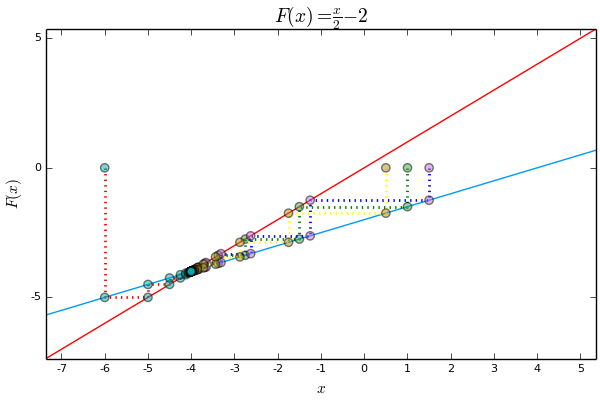

In [26]:
plot(rangox1, g3, # se grafica la función 'g3' en el intervalo -5 a 5
    xaxis=(L"x", (-7.0, 5.0), -7.0:5.0), 
    yaxis=((-7.0, 5.0), L"F(x)"), 
legend=false, title=L"F(x)=\frac{x}{2}-2", grid=false)
plot!(rangox1, x->x, color=:red) 
# se grafican los resultados de las iteraciones para 'g3' con distintas condiciones iniciales y 100  iteraciones
plot!(mapeo_chido(g3, 1,100), 
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g3, 1.5,100), 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g3, 0.5,100), 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

plot!(mapeo_chido(g3, -6,100), 
line=(:red, :path, 2.0, :dot), marker=(:point, 0.5))

En esta función el punto de convergencia es el -4; todos los puntos convergen a dicho punto.

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [27]:
f2(x)=x^2-2
xf2, yf2=mapeo_chido(f2, 1.5, 20000); #se calculan las 20000 iteraciones para la función 'F(x)=x^2-2'
                                      # con condición inicial 1.0, para poder usar 'plots'
f2x1,f2y1=F_2(f2,-1.5,20000); # se calculan 20000 iteraciones para la función 'F(x)=x^2-2'

([0.0,0.25,-1.9375,1.75391,1.07619,-0.841821,-1.29134,-0.332449,-1.88948,1.57013  …  -1.47801,0.184525,-1.96595,1.86496,1.47808,0.184726,-1.96588,1.86467,1.477,0.181515],[0.25,-1.9375,1.75391,1.07619,-0.841821,-1.29134,-0.332449,-1.88948,1.57013,0.465297  …  0.184525,-1.96595,1.86496,1.47808,0.184726,-1.96588,1.86467,1.477,0.181515,-1.96705])


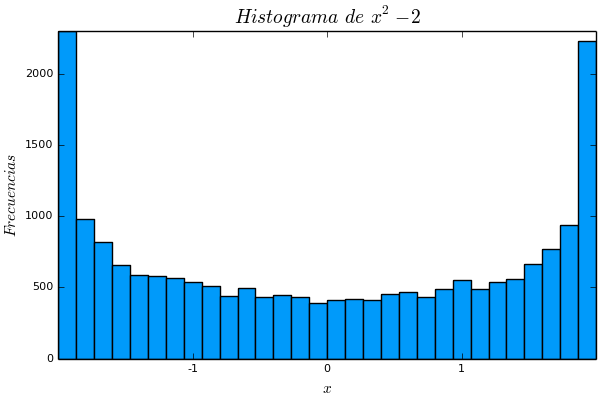

In [28]:
#Se grafica el histograma
histogram(f2x1,xaxis=(L"x"), 
yaxis=(L"Frecuencias"), 
legend=false, title=L"Histograma \,de\, x^2-2", grid=false)

La distribución de las frecuencias en los valores del intervalo asemeja a una parábola. Se puede observar que se toman intervalos en lugar de valores individuales. 


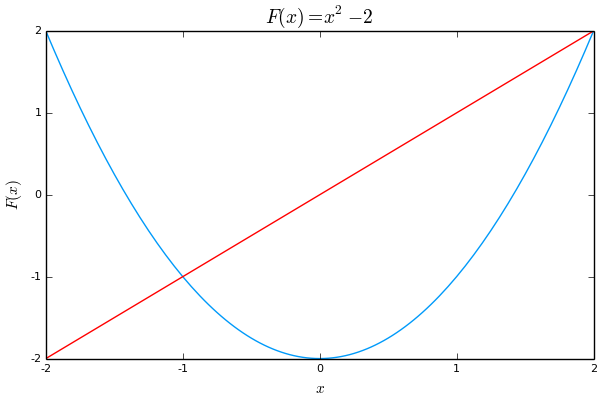

In [30]:
plot(-2.0:1/32:2, f2, xaxis=(L"x", (-2, 2), -2.0:2.0), 
    yaxis=((-2.0, 2.0), L"F(x)"), 
legend=false, title=L"F(x)=x^2-2", grid=false)
plot!(-2.0:1/32:2, x->x, color=:red) 

Cualquier punto en el intervalo $(-2,2)$ excpento la intersección de la recta con la parábola, i.e. $-1$, nos da como resultado el histograma de la figura. Debido a que dicho número es un punt fijo, todas las iteraciones convergen a $-1$ y por lo tanto el histograma muestra un solo valor con frecuencia $20000$. 

# Puntos fijos

Como dijimos antes, el análisis gráfico es útil pero no necesariamente riguroso. 

Un resultado riguroso (¡teorema!) que es útil para encontrar puntos fijos es el **teorema del valor intermedio**:

Supongamos que $F:[a,b]\to\mathbb{R}$ es *continua*, y que $y_0$ se encuentra entre $F(a)$ y $F(b)$. Entonces, existe un punto en $x_0\in[a,b]$ tal que $F(x_0)=y_0$.



Una consecuencia de este teorema es el teorema del punto fijo.

**Teorema del punto fijo**

Supongamos que $F:[a,b]\to[a,b]$ es *continua*. Entonces, existe un punto $x_0 \in [a,b]$ tal que $F(x_0)=x_0$ en $[a,b]$. 

Algunos comentarios:

- El teorema asienta la existencia de un punto fijo; puede haber más.

- El teorema asume que $F$ es *continua* y que mapea al interval $[a,b]$ en si mismo.

- El intervalo $[a,b]$ es *cerrado*.

- El teorema **no** dice cómo encontrar a los puntos fijos.

La prueba se basa en aplicar el teorema del punto intermedio a la función $H(x)=F(x)-x$ y mostrar que existe un valor $x_0$ tal que $H(x_0)=0$. $H(x)$ es continua en el intervalo $[a,b]$ (así que se satisfacen las hipótesis del teorema del punto intermedio) y satisface $H(a) = F(a)-a \ge 0$ y $H(b)=F(b)-b\le 0$. (Estas propiedades se satisfacen ya que $F:[a,b]\to[a,b]$. 

Como vimos en los ejercicios, los puntos fijos aveces *atraen* puntos cercanos, a veces los *repelen*, y otras veces hay cierta atracción o repulsión.

A fin de entender las cosas, consideremos el siguiente mapeo *lineal*:

\begin{equation}
F_\alpha(x) = \alpha x,
\end{equation}

con $0<\alpha <1$.

*Obviamente*, $x^*=0$ es un punto fijo del mapeo.

In [1]:
using Plots, LaTeXStrings

pyplot()

Plots.PyPlotBackend()

In [17]:
# Definición del mapeo
f(x, α) = α * x

f (generic function with 1 method)

Veamos cuál es la dinámica cerca del origen:

In [4]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

In [19]:
const α = 0.6
fα = x -> f(x, α)

(anonymous function)

In [20]:
x1α, fx1α = iteramapeo(fα, 0.8, 10); 
x2α, fx2α = iteramapeo(fα, -0.8, 10); 


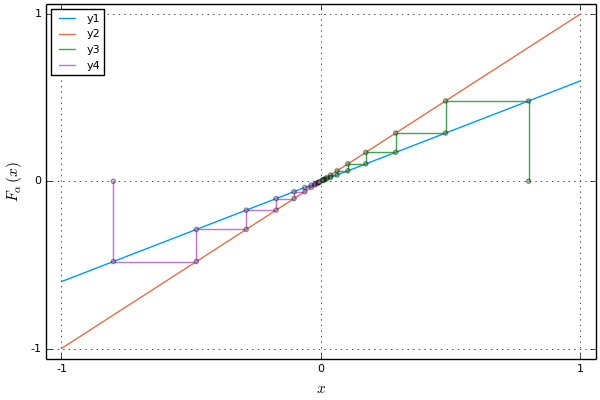

In [21]:
plot(-1:1/32:1, fα, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F_\alpha(x)")
plot!(-1:1/32:1, identity)
plot!(x1α, fx1α, marker=(:dot, 3, 0.4))
plot!(x2α, fx2α, marker=(:dot, 3, 0.4))

In [22]:
fx1α[end], fx2α[end]

(0.004837294079999999,-0.004837294079999999)

Como puede observarse, los puntos *convergen*, o son atraídos al punto fijo $x^*=0$.

Consideremos ahora el caso $\alpha>1$.

In [23]:
const β = 2.2
fβ = x -> f(x, β)

(anonymous function)

In [24]:
x1β, fx1β = iteramapeo(fβ, 0.08, 8); 
x2β, fx2β = iteramapeo(fβ, -0.08, 8); 


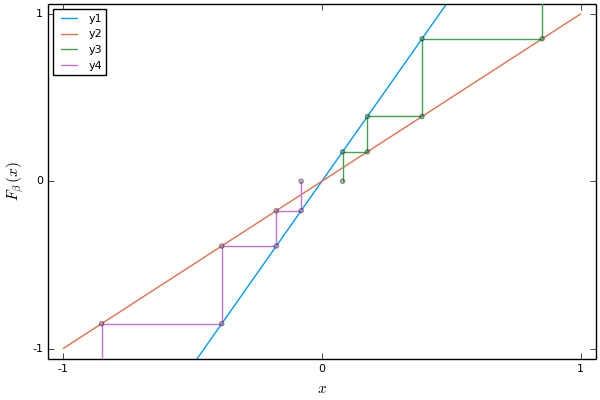

In [25]:
plot(-1:1/32:1, fβ, grid=:false, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\beta(x)", (-1.0, 1.0)))
plot!(-1:1/32:1, identity)
plot!(x1β, fx1β, marker=(:dot, 3, 0.4))
plot!(x2β, fx2β, marker=(:dot, 3, 0.4))


In [26]:
fx1β[end], fx2β[end]

(43.900698828800024,-43.900698828800024)

Claramente, los iterados de un punto cercano al punto fijo $x^*=0$ se alejan de él. Uno dice que el punto fijo los *repele*.

De igual manera podemos hacer el análisis para casos en que el parámetro sea negativo.

In [27]:
const γ = -0.6
fγ = x -> f(x, γ)

const δ = -1.2
fδ = x -> f(x, δ)

(anonymous function)

In [28]:
x1γ, fx1γ = iteramapeo(fγ, 0.8, 14); 
x1δ, fx1δ = iteramapeo(fδ, 0.08, 14); 

# xx = [x1γ x1δ];
# fxx = [fx1γ fx1δ];


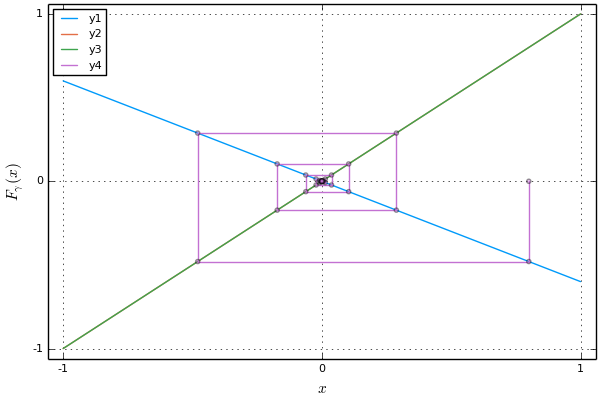

In [29]:
plot(-1:1/32:1, fγ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\gamma(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1γ, fx1γ, marker=(:dot, 3, 0.4))


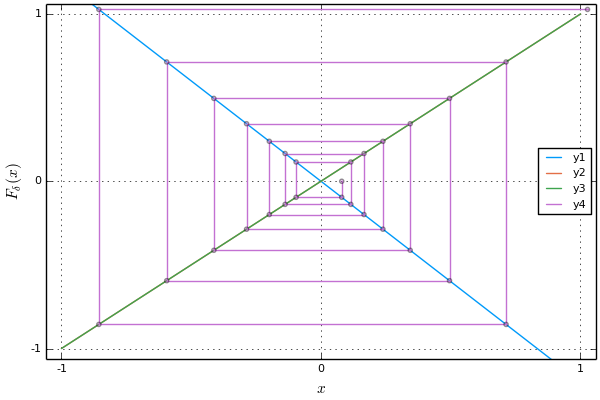

In [30]:
plot(-1:1/32:1, fδ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\delta(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1δ, fx1δ, marker=(:dot, 3, 0.4))


Claramente, la *magnitud* de la derivada en el punto fijo $|F'(x^*)|$ da información sobre el comportamiento local cerca del punto fijo. Así, *definimos* a un **punto fijo atractor** cuando $|F'(x^*)|<1$, y a un **punto fijo repulsor** cuando $|F'(x^*)|>1$. Dependiendo del signo uno puede decir que la convergencia (o divergencia) es *uniforme* (por el mismo lado)
si la derivada es positiva, o *alternante* (por ambos lados) si el signo es negativo.

Esto, en algún sentido aún ambiguo, es lo que significa que un punto fijo es *estable* o *inestable*.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [2]:
g1_1(x)=x^2 # se declara la función 'g1_1(x)=x^2' 

g1_1 (generic function with 1 method)

In [5]:
x1, fx1 = iteramapeo(g1_1, 0.8, 10);  # se calculan las iteraciones para g1_1 a distintas conidciones
x2, fx2 = iteramapeo(g1_1, -0.8, 10); # iniciales 


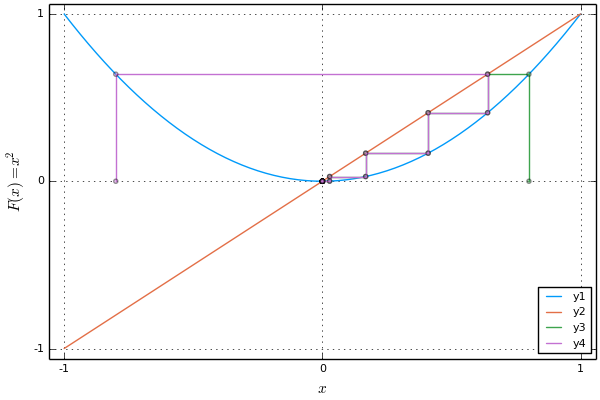

In [15]:
plot(-1:1/32:1, g1_1, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=x^2") # se grafica la función 'g1_1'
plot!(-1:1/32:1, identity)            # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1, fx1, marker=(:dot, 3, 0.4)) # de 1/32
plot!(x2, fx2, marker=(:dot, 3, 0.4))

En este caso, el $0$ es punto fijo y es atractor.

In [7]:
g2_2(x)=-x^3 # se declara la función 'g2_2(x)=-x^3' 

g2_2 (generic function with 1 method)

In [8]:
x1_2, fx1_2 = iteramapeo(g2_2, 0.8, 10); # se calculan las iteraciones para g2_2 a distintas conidciones
x2_2, fx2_2 = iteramapeo(g2_2, -0.8, 10); # iniciales


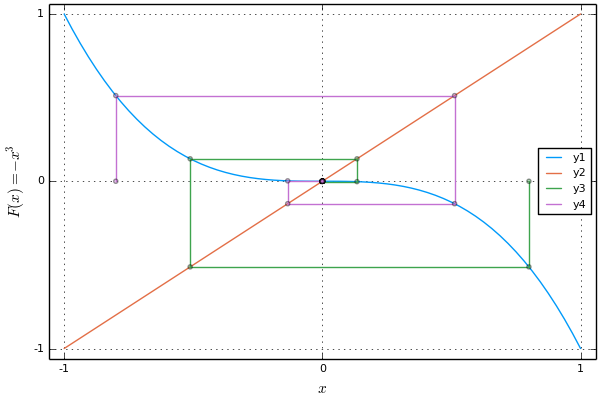

In [14]:
plot(-1:1/32:1, g2_2, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=-x^3") # se grafica la función 'g2_2'
plot!(-1:1/32:1, identity)                # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1_2, fx1_2, marker=(:dot, 3, 0.4)) # de 1/32
plot!(x2_2, fx2_2, marker=(:dot, 3, 0.4))

En este caso el $0$ también es punto fijo y es atractor

In [10]:
g3_3(x)=x^3 # se declara la función 'g3_3(x)=x^3'

g3_3 (generic function with 1 method)

In [11]:
x1_3, fx1_3 = iteramapeo(g3_3, 0.8, 10); # se calculan las iteraciones para g3_3 a distintas conidciones
x2_3, fx2_3 = iteramapeo(g3_3, -0.8, 10); # iniciales


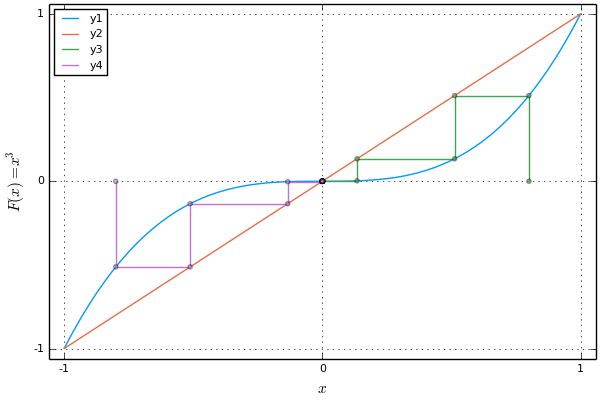

In [13]:
plot(-1:1/32:1, g3_3, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=x^3") # se grafica la función 'g3_3'
plot!(-1:1/32:1, identity)               # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1_3, fx1_3, marker=(:dot, 3, 0.4)) # de 1/32
plot!(x2_3, fx2_3, marker=(:dot, 3, 0.4))

Se cumple lo mismo que en los casos anteriores, el $0$ es punto fijo y atractor.

En los tres casos, el punto $F(0)=F'(0)=0$ cumple que es un punto atractor. 

Para entender el comportamiento descrito anteriormente, usamos el **teorema del valor medio**:

Supongamos que $F$ es una función diferenciable en $[a,b]$. Entonces existe un valor $c\in[a,b]$ tal que la siguiente igualdad se cumple:

\begin{equation}
F'(c) = \frac{F(b)-F(a)}{b-a}.
\end{equation}


Con este resultado demostraremos:

**Teorema del punto fijo atractivo**

Supongamos que $x_0$ es un punto fijo atractivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ entonces $F^n(x)\in I$ *para toda* $n$, y además $F^n(x)\to x_0$ al $n\to\infty$.


**Teorema del punto fijo repulsivo**

Supongamos que $x_0$ es un punto fijo repulsivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ y $x\neq x_0$ entonces existe un entero $n>0$ tal que $F^n(x)\notin I$.

Los teoremas anteriores *muestran* que, numéricamente, los puntos fijos atractivos son sencillos de localizar, mientras que los repulsivos son, en algún sentido, invisibles numéricamente. Para el caso atractivo, si alguno de los iterados de una condición inicial aleatoria *entra* en $I$, tendremos convergencia al punto fijo, mientras que en el caso repulsivo debemos tener un iterado que se mapee *exactamente* en el punto fijo para caer en él. Y esto, en general, nunca ocurre.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

In [29]:
g4(x)=x # se declara la función 'g4(x)=x'

g4 (generic function with 1 method)

In [32]:
x1_4, fx1_4 = iteramapeo(g4, 0.8, 100); # se calculan las iteraciones para g4 a distintas conidciones
x2_4, fx2_4 = iteramapeo(g4, -0.8, 100); # iniciales y 10 iteraciones

([-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8  …  -0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8],[0.0,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8  …  -0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8])


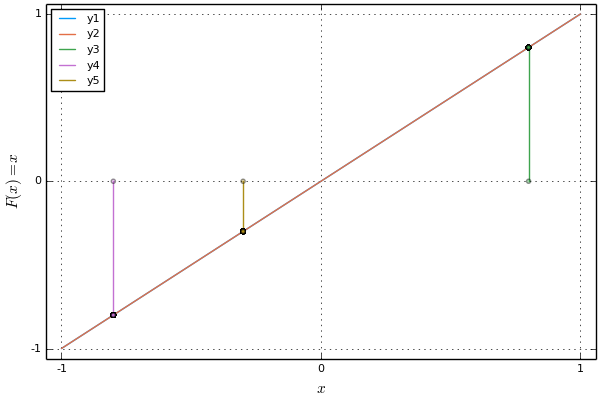

In [34]:
plot(-1:1/32:1, g4, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=x") # se grafica la función g4
plot!(-1:1/32:1, identity)                 # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1_4, fx1_4, marker=(:dot, 3, 0.4))  # de 1/32

plot!(x2_4, fx2_4, marker=(:dot, 3, 0.4))

plot!(iteramapeo(g4, -0.3, 100), marker=(:dot, 3, 0.4))

En este caso, los puntos se quedan en su lugar, es decir, son fijos.

In [5]:
g5(x)=-x  # se declara la función 'g5(x)=-x'

g5 (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



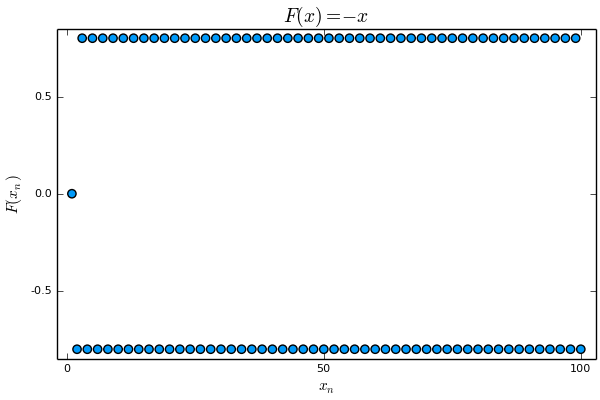

In [8]:
x1_5, fx1_5 = iteramapeo(g5, 0.8, 10); # se calculan las iteraciones para g5 a distintas conidciones
x2_5, fx2_5 = iteramapeo(g5, -0.8, 10);# iniciales y 10 iteraciones para poder graficar las visitas a la identidad.
g5x1,g5y1=F_2(g5,0.8,100)# se calculan 100 iteraciones con condición 0.8
scatter(g5x1,xaxis=(L"x_n"), 
    yaxis=(L"F(x_n)"), 
legend=false, title=L"F(x)=-x", grid=false )


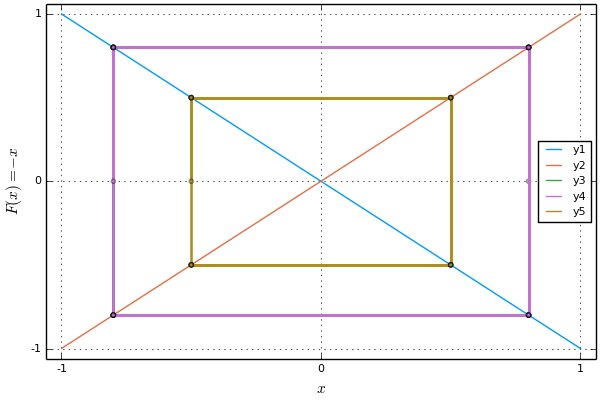

In [9]:
plot(-1:1/32:1, g5, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=-x") # se grafica la función g5
plot!(-1:1/32:1, identity)                 # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1_5, fx1_5, marker=(:dot, 3, 0.4))  # de 1/32
plot!(x2_5, fx2_5, marker=(:dot, 3, 0.4))
plot!(iteramapeo(g5, -0.5, 10), marker=(:dot, 3, 0.4))

En este caso los puntos son periódicos, con periodo 2.

In [10]:
g7(x)=x-x^2 # se declara la función 'g7(x)=x-x^2'

g7 (generic function with 1 method)

In [58]:
x1_7, fx1_7 = iteramapeo(g7, 0.08, 10);  # se calculan las iteraciones para g7 a distintas conidciones
x2_7, fx2_7 = iteramapeo(g7, -0.1, 10); # iniciales y 10 iteraciones
x3_7, fx3_7 = iteramapeo(g7, 1, 10);
x4_7, fx4_7 = iteramapeo(g7, 1.05, 10);
x5_7, fx5_7 = iteramapeo(g7, -0.00009, 10);


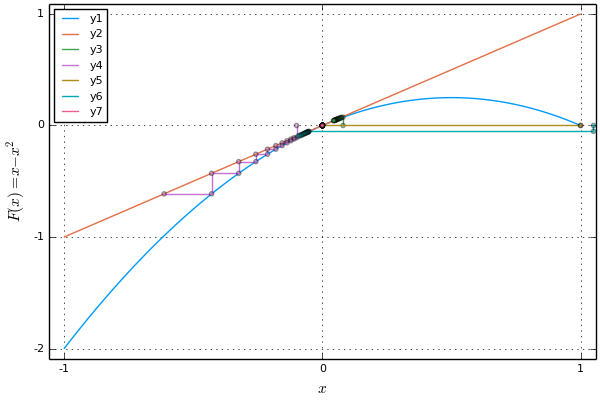

In [59]:
plot(-1:1/32:1, g7, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F(x)=x-x^2") # se grafica la función g7
plot!(-1:1/32:1, identity)                 # se grafican los resultados en el intervalo -1 a 1 con pasos
plot!(x1_7, fx1_7, marker=(:dot, 3, 0.4))  # de 1/32
plot!(x2_7, fx2_7, marker=(:dot, 3, 0.4))
plot!(x3_7, fx3_7, marker=(:dot, 3, 0.4))
plot!(x4_7, fx4_7, marker=(:dot, 3, 0.4))
plot!(x5_7, fx5_7, marker=(:dot, 3, 0.4))
#plot!(iteramapeo(g7, -1.5, 10), marker=(:dot, 3, 0.4))

En este caso parece que el $0$ es punto atractor para valores mayores que cero y menores o iguales que 1, para valores menores que cero y mayores que uno, se convierte en un punto repulsor.

---

**Referencias:**

Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

